# Final Project 1 - Logistic Regression

## a. Introduction

*Project* ini akan membahas mengenai penggunaan algoritma *Machine Learning Logistic Regression* pada *dataset* https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma mengenai *Uber and Lyft Dataset Boston, MA.*

Pertama-tama project ini akan dimulai dengan meng*import dataset* dan melihat kolom-kolom yang ada didalamnya

## b. Import Libraries

In [1]:
# Import libraries
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

#Set Project Directory
project_directory = 'D:/College/Hacktiv8FinalProject/Final Project 1'

In [2]:
#Specify File Path
compressed_file_path = 'UberLyftDataset.zip'
# Read the compressed CSV file 
df = pd.read_csv(compressed_file_path, compression='zip')

In [3]:
# Show top 10 row of dataframe
df.head(10)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
5,f6f6d7e4-3e18-4922-a5f5-181cdd3fa6f2,1.545071e+09,18,17,12,2018-12-17 18:25:12,America/New_York,Haymarket Square,North Station,Lyft,...,0.0221,1545066000,34.19,1545048000,40.66,1545022800,27.39,1545044400,34.97,1545080400
6,462816a3-820d-408b-8549-0b39e82f65ac,1.543209e+09,5,26,11,2018-11-26 05:03:00,America/New_York,Back Bay,Northeastern University,Lyft,...,0.1245,1543251600,40.67,1543233600,46.46,1543255200,37.45,1543291200,43.81,1543251600
7,474d6376-bc59-4ec9-bf57-4e6d6faeb165,1.543780e+09,19,2,12,2018-12-02 19:53:04,America/New_York,Back Bay,Northeastern University,Lyft,...,0.0916,1543770000,36.32,1543726800,50.80,1543788000,35.84,1543748400,50.13,1543788000
8,4f9fee41-fde3-4767-bbf1-a00e108701fb,1.543818e+09,6,3,12,2018-12-03 06:28:02,America/New_York,Back Bay,Northeastern University,Lyft,...,0.0004,1543852800,43.09,1543896000,57.02,1543852800,39.90,1543896000,56.35,1543852800
9,8612d909-98b8-4454-a093-30bd48de0cb3,1.543316e+09,10,27,11,2018-11-27 10:45:22,America/New_York,Back Bay,Northeastern University,Lyft,...,0.1425,1543338000,36.34,1543377600,46.91,1543320000,32.43,1543377600,44.01,1543320000


In [4]:
df.sample(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
667176,2a61e3fb-4caa-4231-9bd9-9363c5c1127d,1.543338e+09,16,27,11,2018-11-27 16:54:22,America/New_York,Haymarket Square,Beacon Hill,Lyft,...,0.1430,1543338000,35.84,1543377600,46.24,1543320000,31.95,1543377600,43.32,1543320000
29463,b5bbcd23-758a-4ba3-86e3-6e1d84470850,1.544751e+09,1,14,12,2018-12-14 01:25:11,America/New_York,Beacon Hill,Haymarket Square,Lyft,...,0.0001,1544716800,17.94,1544688000,33.88,1544731200,13.71,1544688000,32.93,1544734800
83531,1daed124-7b2d-4d21-954f-9bcde2a890cf,1.543714e+09,1,2,12,2018-12-02 01:23:01,America/New_York,Financial District,Northeastern University,Lyft,...,0.0000,1543683600,31.57,1543665600,44.65,1543690800,28.10,1543658400,43.98,1543690800
322218,ea91e873-5a77-4451-9d33-e837ba7696eb,1.544707e+09,13,13,12,2018-12-13 13:20:10,America/New_York,Fenway,Back Bay,Lyft,...,0.0001,1544716800,18.05,1544688000,33.92,1544731200,13.60,1544688000,32.95,1544734800
39203,07622dd8-d723-44b2-861b-55dc4ff29866,1.544837e+09,1,15,12,2018-12-15 01:20:10,America/New_York,North Station,Haymarket Square,Uber,...,0.0000,1544806800,26.76,1544788800,46.90,1544814000,27.41,1544788800,44.15,1544817600


## c. Data Loading / Simple Data Exploration

Disini dataframe akan dicek secara sederhana. Seperti jumlah row dan column, tipe data tiap kolom, dan lain-lain.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [6]:
df.shape

(693071, 57)

Dari hasil eksplorasi data sederhana ini, ada sekitar 693071 baris dan sekitar 57 kolom. Disini ada 10 kolom yang penting yang bisa digunakan yaitu:
1. id
2. timestamp
3. hour
4. day
5. month
6. datetime
7. timezone
8. source: destinasi awal
9. destination: destinasi akhir
10. cab_type: tipe transportasi (uber / lyft)
11. Dan lain-lain

Disini setiap kolom akan digunakan(kecuali id dikarenakan unique value), lalu akan dicek korelasi antar kolomnya, lalu hapus kolom yang memiliki korelasi mirip sehingga bisa mengurangi data redudancy. Pertama-tama pisahkan data numeric dengan data categorical

## d. Data Cleaning

Di tahap ini, dataframe dari UberLyft akan dicek kebersihannya dengan membersihkan data duplikat, missing values(nilai kosong) serta membuang kolom data yang kurang relevan pada dataframe.

In [7]:
df_numerical = df.select_dtypes(["float64","int64"]).columns
df_numerical

Index(['timestamp', 'hour', 'day', 'month', 'price', 'distance',
       'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'precipIntensity', 'precipProbability',
       'humidity', 'windSpeed', 'windGust', 'windGustTime', 'visibility',
       'temperatureHigh', 'temperatureHighTime', 'temperatureLow',
       'temperatureLowTime', 'apparentTemperatureHigh',
       'apparentTemperatureHighTime', 'apparentTemperatureLow',
       'apparentTemperatureLowTime', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'sunriseTime',
       'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime',
       'temperatureMin', 'temperatureMinTime', 'temperatureMax',
       'temperatureMaxTime', 'apparentTemperatureMin',
       'apparentTemperatureMinTime', 'apparentTemperatureMax',
       'apparentTemperatureMaxTime'],
      dtype='object')

In [8]:
df_categorical = df.select_dtypes('object').columns
df_categorical

Index(['id', 'datetime', 'timezone', 'source', 'destination', 'cab_type',
       'product_id', 'name', 'short_summary', 'long_summary', 'icon'],
      dtype='object')

cek jika len(panjang) kolom numeric + kolom categorical = kolom df

In [9]:
len(df_numerical) + len(df_categorical) == len(df.columns)

True

Dikarenakan data kategorikal bakal memiliki value yang sama(kategorik), cek berapa unique values yang dimiliki oleh setiap data kategorikal ini.

In [10]:
for col in df_categorical:
    print(f'{col} : {df[col].nunique()} unique values')

id : 693071 unique values
datetime : 31350 unique values
timezone : 1 unique values
source : 12 unique values
destination : 12 unique values
cab_type : 2 unique values
product_id : 13 unique values
name : 13 unique values
short_summary : 9 unique values
long_summary : 11 unique values
icon : 7 unique values


Hasil disini menunjukkan bahwa ada beberapa kolom data yang terlalu bervariasi untuk sebuah data kategorikal, lalu ada 1 kolom yang mempunyai 1 data kategorikal saja. Dari hasil ini, kolom data yang akan dihapus adalah {id, product_id, datetimne, timezone}.

In [11]:
df = df.drop(columns=['id','product_id','timezone','timestamp'])

### d.1 Duplicates and Missing Value Handling

Proses bisa dilanjut dengan menghapus data duplikat dan menghandle nilai kosong (missing values)

In [12]:
df = df.drop_duplicates()
df.shape

(691578, 53)

In [13]:
df.isnull().sum()

hour                               0
day                                0
month                              0
datetime                           0
source                             0
destination                        0
cab_type                           0
name                               0
price                          54542
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
visibility                         0
temperatureHigh                    0
temperatureHighTime                0
temperatureLow                     0
t

In [14]:
df = df.dropna()

In [15]:
df.isnull().sum()

hour                           0
day                            0
month                          0
datetime                       0
source                         0
destination                    0
cab_type                       0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatureLow                 0
temperatureLowTime             0
apparentTemperatureHigh        0
apparentTemperatureHighTime    0
apparentTe

Data duplikat dan data dengan nilai kosong sudah dibersihkan, proses bisa dilanjut dengan Feature Engineering pada data kategorikal

In [16]:
df_categorical = df.select_dtypes(['object']).columns
df_categorical

Index(['datetime', 'source', 'destination', 'cab_type', 'name',
       'short_summary', 'long_summary', 'icon'],
      dtype='object')

In [17]:
for col in df_categorical:
    print(f'{col} : {df[col].nunique()} unique values')

datetime : 31350 unique values
source : 12 unique values
destination : 12 unique values
cab_type : 2 unique values
name : 12 unique values
short_summary : 9 unique values
long_summary : 11 unique values
icon : 7 unique values


In [18]:
df['datetime'].head()

0    2018-12-16 09:30:07
1    2018-11-27 02:00:23
2    2018-11-28 01:00:22
3    2018-11-30 04:53:02
4    2018-11-29 03:49:20
Name: datetime, dtype: object

Dari hasil datetime bisa dilihat bahwa data type masih object, sehingga data ada kemungkinan tidak memiliki format penulisan yang sama. Maka tahap selanjutnya adalah untuk mengubah tipe data object menjadi datetime

In [19]:
df['date'] = pd.to_datetime(df['datetime'], format='%Y/%m/%d %H:%M')
df['date'].head()

0   2018-12-16 09:30:07
1   2018-11-27 02:00:23
2   2018-11-28 01:00:22
3   2018-11-30 04:53:02
4   2018-11-29 03:49:20
Name: date, dtype: datetime64[ns]

Setelah kolom datetime kita format dengan benar, kita bisa menyusun format datetime untuk memvisualisasikan jumlah perjalanan yang terjadi baik itu per hari maupun per jam dengan melakukan visualisasi data.

## e. Explorasi Data

In [21]:
#clasiffy ['date'] column into 6 classes in hours 0-3am 4-7 am and so on
def klasifikasi_hour(hour):
    if 0 <= hour <= 3:
        return '0-3am'
    elif 4 <= hour <= 7:
        return '4-7am'
    elif 8 <= hour <= 11:
        return '8-11am'
    elif 12 <= hour <= 15:
        return '12-15pm'
    elif 16 <= hour <= 19:
        return '16-19pm'
    elif 20 <= hour <= 23:
        return '20-23pm' 
    
# Call the funtion and create a new column for it
df['hour_classify'] = df['date'].dt.hour.apply(klasifikasi_hour)

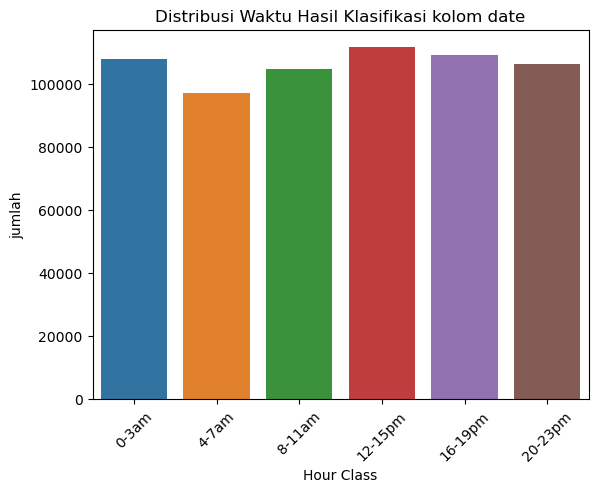

In [22]:
#Plot the classification
sns.countplot(x='hour_classify', data=df, order=['0-3am', '4-7am', '8-11am', '12-15pm', '16-19pm', '20-23pm'])
plt.title('Distribusi Waktu Hasil Klasifikasi kolom date')
plt.xlabel('Hour Class')
plt.ylabel('jumlah')
plt.xticks(rotation=45)
plt.show()

Dari hasil ini bisa disimpulkan bahwa jumlah perjalanan di kelas waktu tertinggi terletak di jam 12-15 siang dengan jumlah perjalanan terendah terletak di jam 4-7 pagi, namun bisa dibilang distribusi data berdasarkan jam tadi bisa dibilang cukup rata. Selain ini, penggambaran jumlah perjalanan (trips) bisa kita lacak dengan hari(day) dari kolom 'date'.

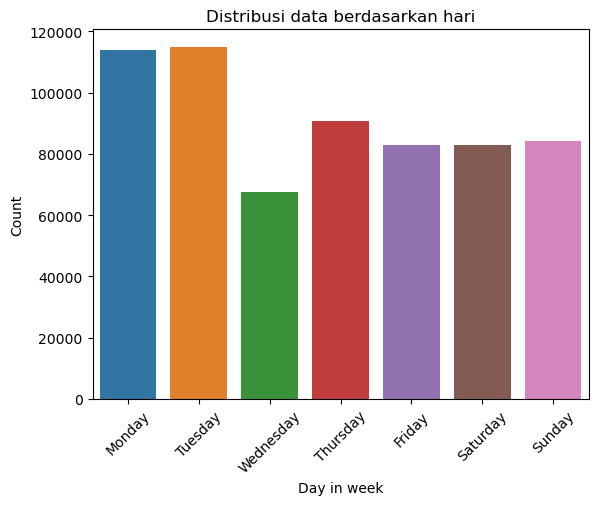

In [24]:
# Classify the day of date of the week
df['day_in_week'] = df['date'].dt.day_name()

# Plot the classification
sns.countplot(x='day_in_week', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] )
plt.title('Distribusi data berdasarkan hari')
plt.xlabel('Day in week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Dari hasil countplot ini bisa disimpulkan bahwa peak trips/perjalanan yang ada di dataset ini berada di hari senin dan selasa. Dengan jumlah perjalanan paling sedikit terletak di hari rabu.

## f. Data Preprocessing